In [ ]:
# -*- coding: utf-8 -*-
"""
Data: 25/10/2021
@author: Diones Francisco Rossetto
Trabalho da disciplina de Análise de Dados com Python - ciclo 3
"""
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from numpy import percentile, median
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumption.csv to FuelConsumption (1).csv


In [ ]:
df = pd.read_csv("FuelConsumption.csv")
#verificar os dados no dataframe 
print(df.head(1))
print(df.describe())
print(">>> " + str(df.size))

   MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196

[1 rows x 13 columns]
       MODELYEAR   ENGINESIZE  ...  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
count     1067.0  1067.000000  ...               1067.000000   1067.000000
mean      2014.0     3.346298  ...                 26.441425    256.228679
std          0.0     1.415895  ...                  7.468702     63.372304
min       2014.0     1.000000  ...                 11.000000    108.000000
25%       2014.0     2.000000  ...                 21.000000    207.000000
50%       2014.0     3.400000  ...                 26.000000    251.000000
75%       2014.0     4.300000  ...                 31.000000    294.000000
max       2014.0     8.400000  ...                 60.000000    488.000000

[8 rows x 8 columns]
>>> 13871


In [ ]:
# ------------------ inicio 1 e 2 ----------------
# separar a amostra aleatoriamente em 10% para validacao e 90% para treinamento
msk = np.random.rand(len(df)) < 0.9
train = df[msk]
test = df[~msk]
train
# ------------------ fim 1 e 2 ----------------

MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0          2014  ACURA  ...                       33          196
1          2014  ACURA  ...                       29          221
2          2014  ACURA  ...                       48          136
3          2014  ACURA  ...                       25          255
4          2014  ACURA  ...                       27          244
...         ...    ...  ...                      ...          ...
1062       2014  VOLVO  ...                       24          271
1063       2014  VOLVO  ...                       25          264
1064       2014  VOLVO  ...                       24          271
1065       2014  VOLVO  ...                       25          260
1066       2014  VOLVO  ...                       22          294

[968 rows x 13 columns]

In [ ]:
# ------------------ inicio 3 -------------------
# colunas que sao variáveis categóricas e que são variáveis numéricas
print(train.dtypes)
# Existem dados ausentes? 
soma_f = np.sum(train.isnull()) # verifica a soma de dados ausentes no treinamento
print('Quantidade de dados ausentes:\n{}'.format(soma_f)) 
dados_f = train.fillna('0x0')
# Quantos tipos de fabricantes diferentes temos neste dataset?
lf = train['MAKE'].unique()
print(f"Fabricantes diferentes no dataset:\n{lf}")
print(f"Quantidade de fabricantes diferentes no dataset: {len(lf)}")
# Quantos tipos de trasmissao temos neste dataset?
lft = train['TRANSMISSION'].unique()
print(f"Transmissões diferentes no dataset:\n{lft}")
print(f"Quantidade de Transmissões diferentes no dataset: {len(lft)}")
# ------------------ fim    3 -------------------

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object
Quantidade de dados ausentes:
MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64
Fabricantes diferentes no dataset:
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BU

Constant :  125.08265383235039
Weight/Coefficient :  39.06384628446886
A equação do modelo é : y = (39.063846)x + 125.082654
R2 Value :  0.7485888172554305


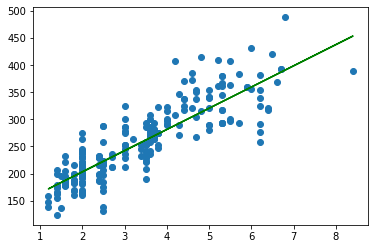

In [ ]:
lr = LinearRegression()
x = train[["ENGINESIZE"]]   # Feature
y = train[["CO2EMISSIONS"]] # target
x_train , x_test, y_train, y_test = tts(x,y , random_state = 1) 
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test , y_pred , "g-")
constant = lr.intercept_[0]
weight = lr.coef_[0][0]
print("Constant : ", lr.intercept_[0])
print("Weight/Coefficient : ", lr.coef_[0][0])
print("A equação do modelo é : ""y = (%f)x + %f" %(weight, constant))
print("R2 Value : ", r2_score(y_test , y_pred))

   CYLINDERS  ENGINESIZE  ...  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
0          4         2.0  ...                        33           196
1          4         2.4  ...                        29           221
2          4         1.5  ...                        48           136
3          6         3.5  ...                        25           255
4          6         3.5  ...                        27           244
5          6         3.5  ...                        28           230
6          6         3.5  ...                        28           232
7          6         3.7  ...                        25           255
8          6         3.7  ...                        24           267

[9 rows x 7 columns]


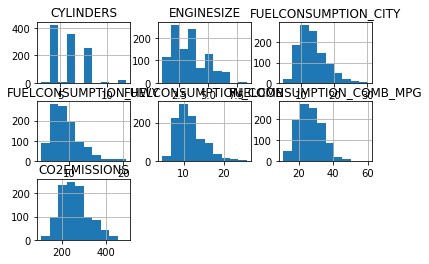

In [ ]:
# ------------------ inicio 4 -------------------
# pair-wise correlation between columns
cdf = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
print(cdf.head(9))
v = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
v.hist()
plt.show()
# ------------------ fim    4 -------------------

In [ ]:
cdf.corr()

CYLINDERS  ...  CO2EMISSIONS
CYLINDERS                  1.000000  ...      0.849685
ENGINESIZE                 0.934011  ...      0.874154
FUELCONSUMPTION_CITY       0.796473  ...      0.898039
FUELCONSUMPTION_HWY        0.724594  ...      0.861748
FUELCONSUMPTION_COMB       0.776788  ...      0.892129
FUELCONSUMPTION_COMB_MPG  -0.770430  ...     -0.906394
CO2EMISSIONS               0.849685  ...      1.000000

[7 rows x 7 columns]

In [ ]:
import plotly.express as px;
fig=px.scatter(cdf, x = 'ENGINESIZE', opacity=0.9, y = 'CYLINDERS', width = 800)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Tamanho do motor x Número de cilindros')
fig.update_xaxes(title = 'Tamanho do motor')
fig.update_yaxes(title = 'Número de cilindros')
fig.show()
print('----------------------')
fig=px.scatter(cdf, y = 'FUELCONSUMPTION_HWY', x = 'CYLINDERS', width = 800)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Número de cilindros x Gasto de combustível na estrada')
fig.update_yaxes(title = 'Gasto de combustível na estrada')
fig.update_xaxes(title = 'Número de cilindros')
fig.show()

----------------------


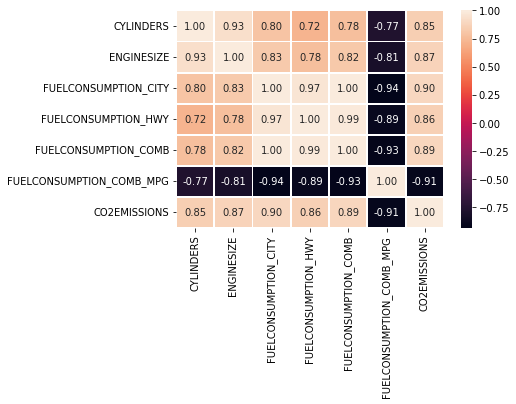

In [ ]:
# plot da matriz de correlação
correlation= cdf.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".2f", linewidths=.8)
plot

CYLINDERS         5.794752
CO2EMISSIONS    256.228679
dtype: float64
-------------


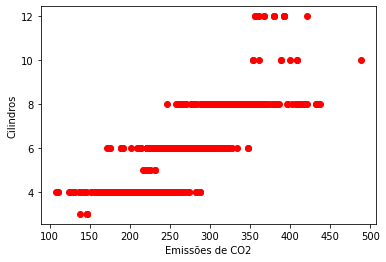

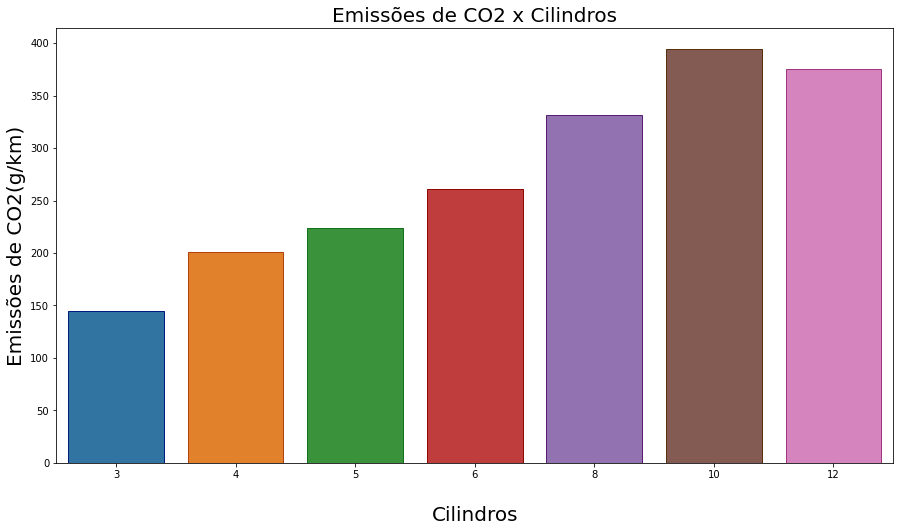

In [ ]:
# ------------------ inicio 5 -------------------
vc = pd.Series(df['CYLINDERS'])
# media das colunas
print(df[['CYLINDERS','CO2EMISSIONS']].mean())

plt.scatter(df.CO2EMISSIONS, vc, color='red')
plt.xlabel("Emissões de CO2")
plt.ylabel("Cilindros")
plt.show()
print('-------------')
media_grupo = df.groupby(vc)['CO2EMISSIONS'].mean().sort_values().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x = "CYLINDERS", y = "CO2EMISSIONS", data = media_grupo, edgecolor = sns.color_palette("dark",10), estimator=median)
plt.title('Emissões de CO2 x Cilindros', fontsize=20)
plt.xlabel('\nCilindros', fontsize=20)
plt.ylabel('Emissões de CO2(g/km)', fontsize=20)
plt.show()
# ------------------ fim 5 -------------------

CO2EMISSIONS    256.228679
dtype: float64
---------------


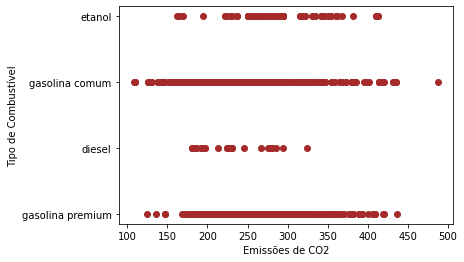

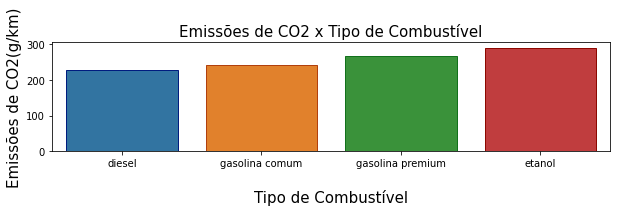

In [ ]:
# ------------------ inicio 6 -------------------
# O valor ‘X’ indica que o carro utiliza gasolina comum; ‘Z’, gasolina premium; ‘D’, diesel; ‘E’, etanol
fuel_t = pd.Series(df['FUELTYPE'])
fuel_t = fuel_t.replace('Z', 'gasolina premium')
fuel_t = fuel_t.replace('D', 'diesel')
fuel_t = fuel_t.replace('E', 'etanol')
fuel_t = fuel_t.replace('X', 'gasolina comum')
fuel_t
# media das colunas
print(df[['CO2EMISSIONS', 'FUELTYPE']].mean())
plt.scatter(df.CO2EMISSIONS, fuel_t, color='brown')
plt.xlabel("Emissões de CO2")
plt.ylabel("Tipo de Combustível")
plt.show()
print('---------------')
media_grupo = df.groupby(fuel_t)['CO2EMISSIONS'].mean().sort_values().reset_index()
plt.figure(figsize=(10,2))
sns.barplot(x = "FUELTYPE", y = "CO2EMISSIONS", data = media_grupo, edgecolor = sns.color_palette("dark", 4), estimator=median)
plt.title('Emissões de CO2 x Tipo de Combustível', fontsize=15)
plt.xlabel('\nTipo de Combustível', fontsize=15)
plt.ylabel('Emissões de CO2(g/km)', fontsize=15)
plt.show()
# o combustível que mais emite CO2 é o etanol e o que menos emite é o diesel
# ------------------   fim 6 -------------------

CO2EMISSIONS    256.228679
dtype: float64
----------


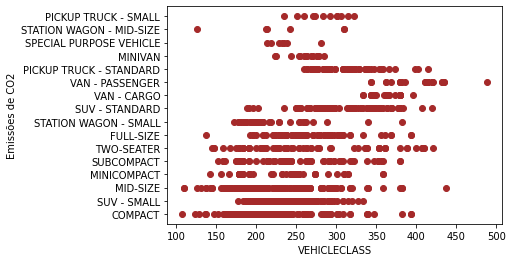

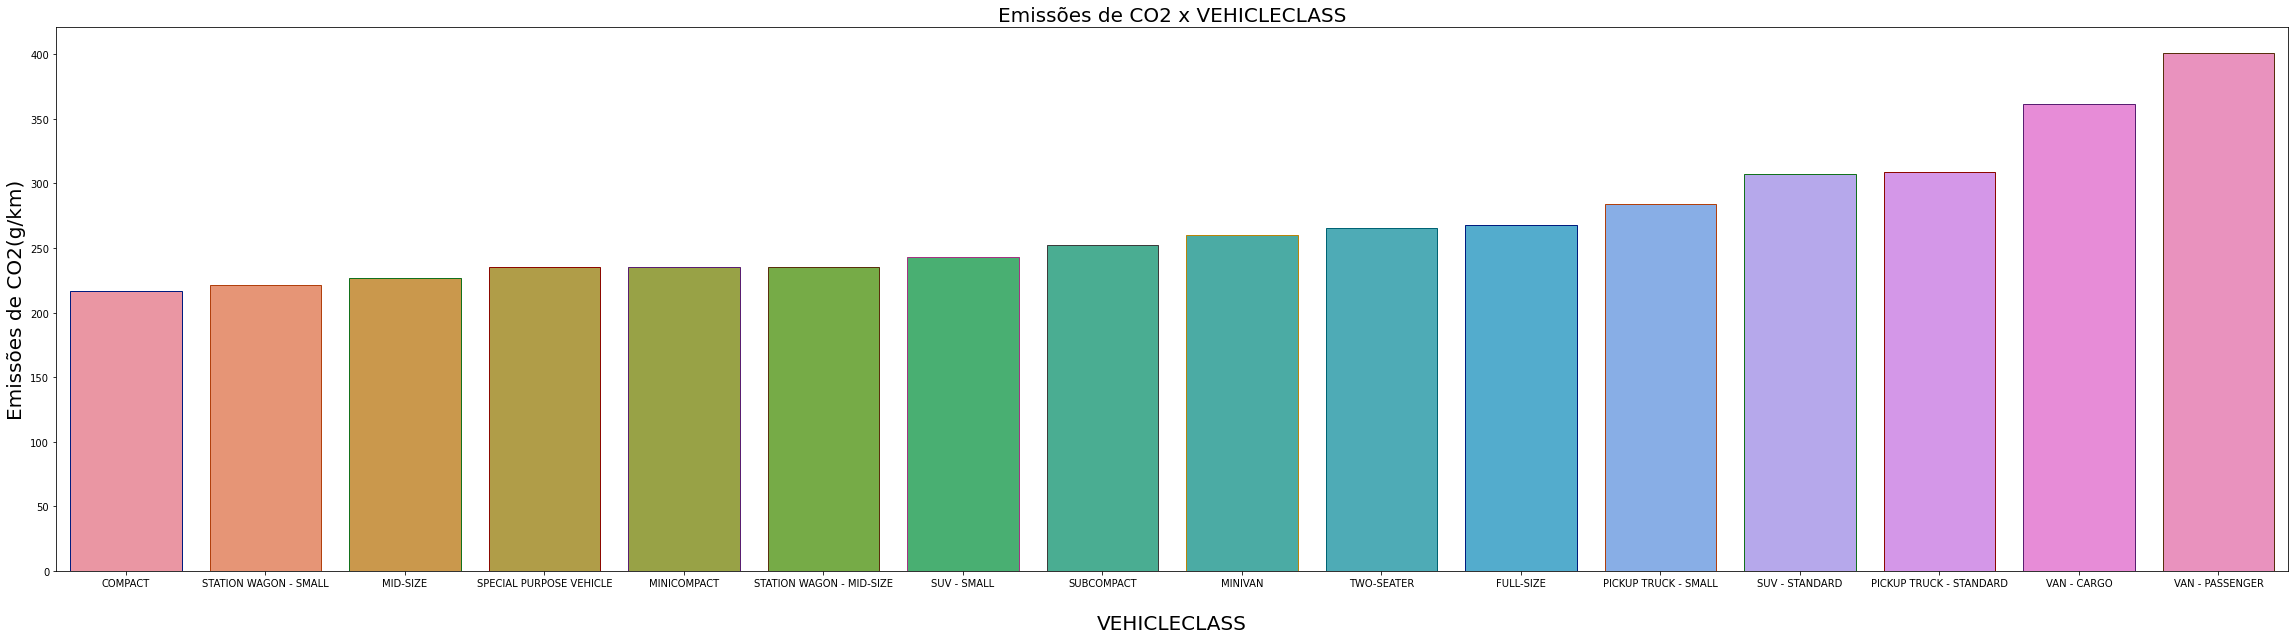

In [ ]:
# ------------------ inicio 7 -------------------
vc = pd.Series(df['VEHICLECLASS'])
# media das colunas
print(df[['VEHICLECLASS','CO2EMISSIONS']].mean())

plt.scatter(df.CO2EMISSIONS, vc, color='brown')
plt.ylabel("Emissões de CO2")
plt.xlabel("VEHICLECLASS")
plt.show()
print('----------')
media_grupo = df.groupby(vc)['CO2EMISSIONS'].mean().sort_values().reset_index()

plt.figure(figsize=(40,10))
sns.barplot(x = "VEHICLECLASS", y = "CO2EMISSIONS", data = media_grupo, edgecolor = sns.color_palette("dark",10), estimator=median)
plt.title('Emissões de CO2 x VEHICLECLASS', fontsize=20)
plt.xlabel('\nVEHICLECLASS', fontsize=20)
plt.ylabel('Emissões de CO2(g/km)', fontsize=20)
plt.show()
# ------------------ fim 7 -------------------

In [ ]:
# ------------------ inicio 8 -------------------
marchas_6 = ['M6', 'AS6', 'A6', 'AM6','AV6']
df_6 = train[train['TRANSMISSION'].isin(marchas_6)]
df_6.count()
df_6.shape
df_6['TRANSMISSION']
lft = df_6['TRANSMISSION'].unique()
print(f"Transmissões diferentes no dataset:\n{lft}")
print(f"Quantidade de Transmissões diferentes no dataset: {len(lft)}")

Transmissões diferentes no dataset:
['M6' 'AS6' 'A6' 'AM6' 'AV6']
Quantidade de Transmissões diferentes no dataset: 5


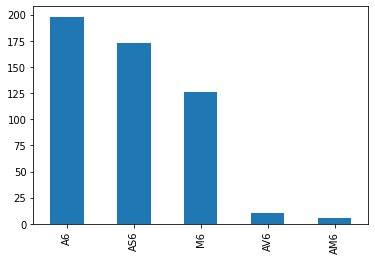

In [ ]:
df_6['TRANSMISSION'].value_counts().plot.bar()

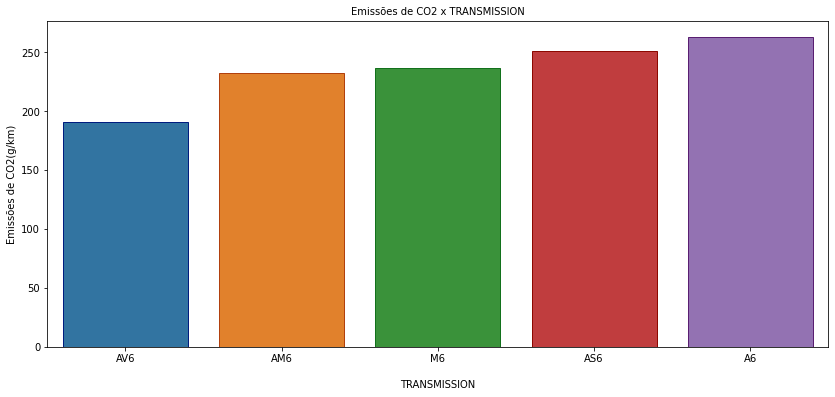

In [ ]:
t = pd.Series(df_6['TRANSMISSION'])
# media das colunas
media_grupo = df_6.groupby(t)['CO2EMISSIONS'].mean().sort_values().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(x = "TRANSMISSION", y = "CO2EMISSIONS", data = media_grupo, edgecolor = sns.color_palette("dark",10), estimator=median)
plt.title('Emissões de CO2 x TRANSMISSION', fontsize=10)
plt.xlabel('\nTRANSMISSION', fontsize=10)
plt.ylabel('Emissões de CO2(g/km)', fontsize=10)
plt.show()
# ------------------ fim 8 -------------------

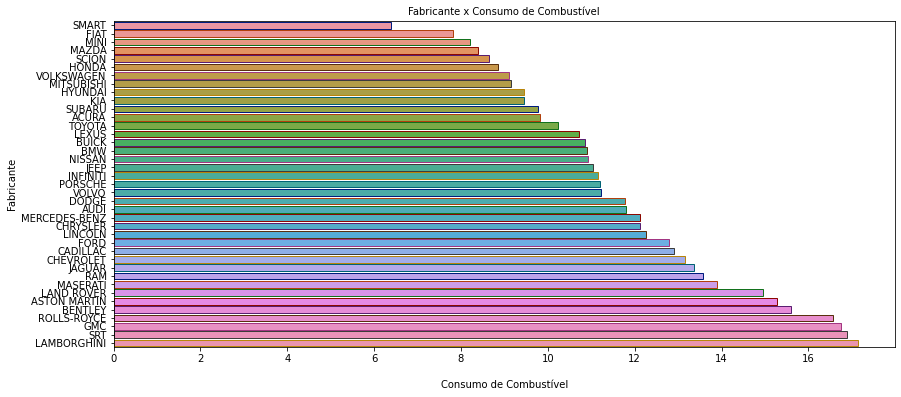

In [ ]:
# ------------------ inicio 9 -------------------
m = pd.Series(df['MAKE'])
# media das colunas
media_grupo = df.groupby(m)['FUELCONSUMPTION_COMB'].mean().sort_values().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(y = "MAKE", x = "FUELCONSUMPTION_COMB", data = media_grupo, edgecolor = sns.color_palette("dark",10), estimator=median)
plt.title('Fabricante x Consumo de Combustível', fontsize=10)
plt.xlabel('\nConsumo de Combustível', fontsize=10)
plt.ylabel('Fabricante', fontsize=10)
plt.show()
# ------------------ fim 9 -------------------

In [ ]:
# teste do profiling do pandas
!pip install pandas-profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport
print ('################## report profile ############')
profile = ProfileReport(df, title='Profiling Report', minimal=True, progress_bar=False)
profile.to_file("report.html")
profile.to_widgets()
print('#### THE END ####')

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (34.6 MB)
################## report profile ############


#### THE END ####
